<a href="https://colab.research.google.com/github/shahnbej/Data_Science/blob/main/Superstore_sales_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Project Overview
This project analyzes a sales dataset to uncover insights about sales performance, customer behavior, and product trends. We’ll perform:

**Exploratory Data Analysis **(EDA) to understand the data’s structure, patterns, and anomalies.
# Advanced Techniques like clustering for customer segmentation.
Interactive Dashboard to present findings in an engaging way.
We’ll use the Superstore Sales Dataset, a widely used dataset available on Kaggle, which contains sales data with features like order dates, customer details, product categories, sales amounts, and profits. While not truly "real-time" (streaming), it’s recent and representative of sales data, suitable for this analysis.

In [2]:
!pip install dash
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 17.2 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [3]:
!pip install --upgrade dash

# **Step 2: Setup and Data Loading**
Let’s start by setting up the environment and loading the data.

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Set random seed for reproducibility
np.random.seed(42)

# Load the Superstore Sales dataset (assumes the file is downloaded from Kaggle)
#Dataset source: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting
#data = pd.read_csv('Sample - Superstore.csv')
data = pd.read_excel('Sample - Superstore.xls')

# Display the first few rows to understand the data structure
print(data.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

# Step 3: Data Cleaning and Preprocessing
Before analysis, we need to clean the data to ensure quality.

In [7]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values (example: fill missing 'Postal Code' with a placeholder)
data['Postal Code'] = data['Postal Code'].fillna('Unknown')

# Convert 'Order Date' and 'Ship Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')
# data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d/%m/%Y')

# Check for duplicates and remove if any
data = data.drop_duplicates()

# Display data info to confirm changes
print(data.info())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        99

In [8]:
# import pandas as pd

# # Assuming 'data' is your DataFrame
# numeric_cols = ['Sales', 'Profit', 'Discount', 'Profit Ratio']

# # Convert object columns to numeric
# for col in numeric_cols:
#     data[col] = pd.to_numeric(data[col], errors='coerce')

# # Check for NaN values introduced during conversion
# nan_counts = data[numeric_cols].isna().sum()
# print("NaN counts after conversion:")
# print(nan_counts)

# # If NaNs exist, you may need to investigate and clean further
# if nan_counts.any():
#     print("Investigate problematic entries where NaNs appeared.")
# else:
#     print("All columns successfully converted to numeric.")

# Step 4: Exploratory Data Analysis (EDA)
Let’s explore the data to uncover insights.

# 4.1 Descriptive Statistics

In [9]:
# Get summary statistics for numerical columns
print(data.describe())

# Comments:
# - 'Sales', 'Profit', and 'Quantity' are key numerical columns.
# - Mean sales and profit give an overall picture, while std (standard deviation) shows variability.
# - Min and max help spot potential outliers (e.g., negative profit or very high sales).

            Row ID                     Order Date  \
count  9994.000000                           9994   
mean   4997.500000  2016-04-30 00:07:12.259355648   
min       1.000000            2014-01-03 00:00:00   
25%    2499.250000            2015-05-23 00:00:00   
50%    4997.500000            2016-06-26 00:00:00   
75%    7495.750000            2017-05-14 00:00:00   
max    9994.000000            2017-12-30 00:00:00   
std    2885.163629                            NaN   

                           Ship Date   Postal Code         Sales     Quantity  \
count                           9994   9994.000000   9994.000000  9994.000000   
mean   2016-05-03 23:06:58.571142912  55190.379428    229.858001     3.789574   
min              2014-01-07 00:00:00   1040.000000      0.444000     1.000000   
25%              2015-05-27 00:00:00  23223.000000     17.280000     2.000000   
50%              2016-06-29 00:00:00  56430.500000     54.490000     3.000000   
75%              2017-05-18 00:00:00

# 4.2 Visualizations

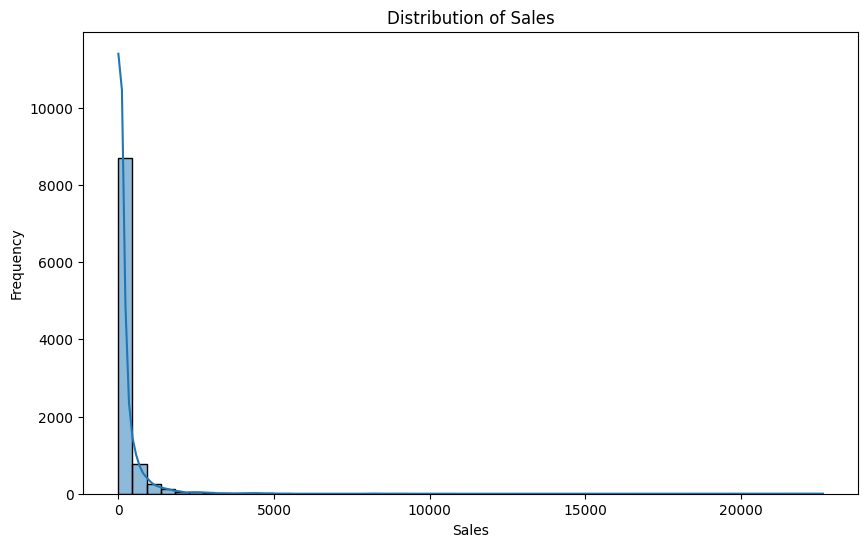

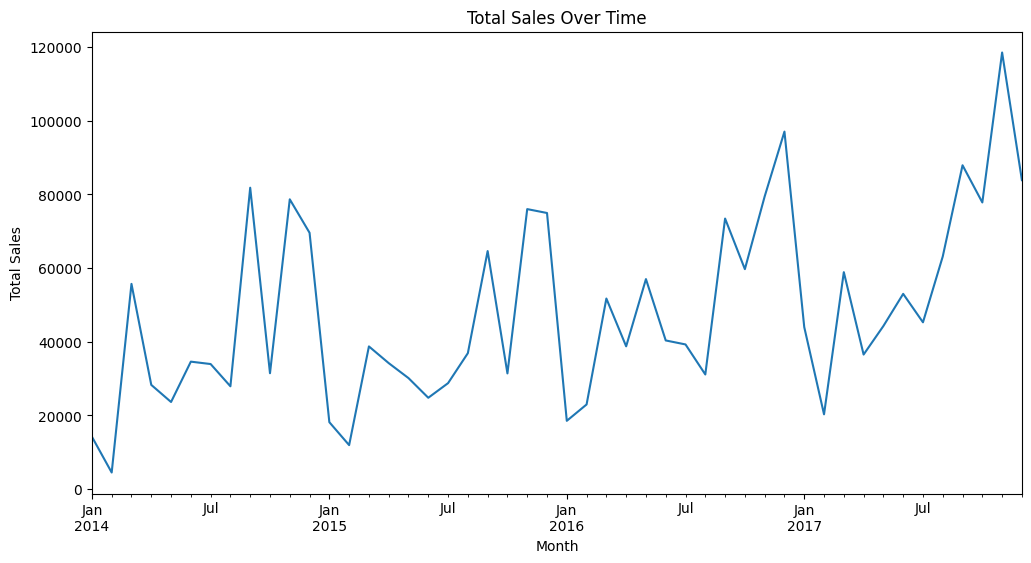

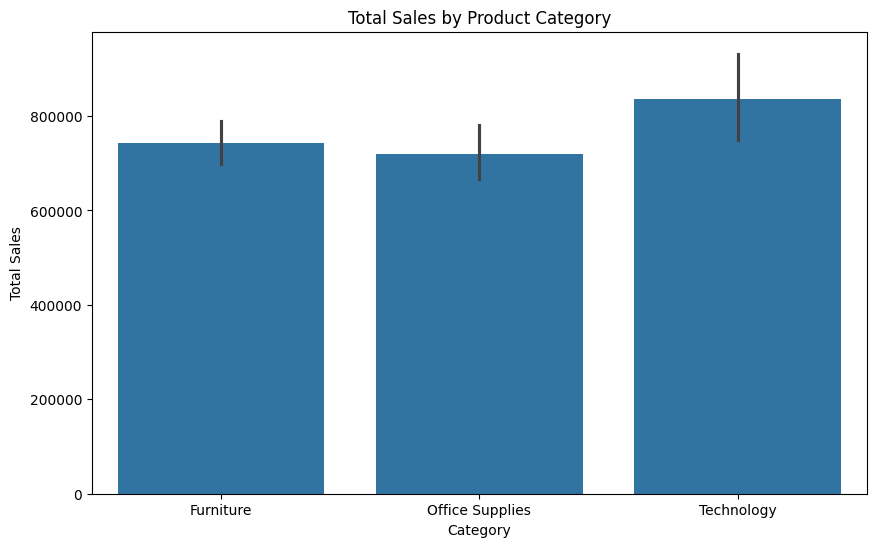

In [10]:
# Histogram of Sales to see distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], bins=50, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Comments:
# - The histogram shows if sales are skewed (e.g., right-skewed with many small sales and few large ones).
# - KDE (kernel density estimate) smooths the distribution for better visualization.

# Time series plot of Sales over time
data['Order Month'] = data['Order Date'].dt.to_period('M').dt.to_timestamp()
monthly_sales = data.groupby('Order Month')['Sales'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Comments:
# - We aggregate sales by month to identify trends or seasonality.
# - A rising trend might indicate growth, while periodic peaks suggest seasonal effects.

# Bar plot of Sales by Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=data, estimator=np.sum)
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

# Comments:
# - This shows which product categories (e.g., Technology, Furniture) contribute most to sales.
# - `estimator=np.sum` ensures we’re summing sales, not averaging.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [12]:
import pandas as pd

# Assuming 'data' is your DataFrame
data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce')
data['Profit'] = pd.to_numeric(data['Profit'], errors='coerce')
# If 'Quantity' is also involved and not already int64, convert it too
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')

In [13]:
print("NaN values in Sales:", data['Sales'].isna().sum())
print("NaN values in Profit:", data['Profit'].isna().sum())
print("NaN values in Quantity:", data['Quantity'].isna().sum())

# Optionally, drop rows with NaN in these columns
data = data.dropna(subset=['Sales', 'Profit', 'Quantity'])

NaN values in Sales: 0
NaN values in Profit: 0
NaN values in Quantity: 0


In [26]:
# # Initial aggregation by Customer ID
# customer_data = data.groupby('Customer ID').agg({
#     'Sales': 'sum',
#     'Profit': 'sum',
#     'Quantity': 'sum'
# }).reset_index()

# # Some clustering steps (e.g., K-means) might follow here
# # customer_data['Cluster'] = kmeans.fit_predict(...)

# # Then compute mean by cluster
# cluster_summary = customer_data.groupby('Cluster').mean()

In [25]:
# # Initial aggregation by Customer ID
# customer_data = data.groupby('Customer ID').agg({
#     'Sales': 'sum',
#     'Profit': 'sum',
#     'Quantity': 'sum'
# }).reset_index()

# # Perform K-means clustering and assign cluster labels
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler

# # Standardize features
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(customer_data[['Sales', 'Profit', 'Quantity']])

# # Apply K-means
# kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters
# customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

# # Now compute mean by cluster (this should work now)
# cluster_summary = customer_data.groupby('Cluster').mean()


# Explanation of Changes:

Explicit Column Selection: The line cluster_summary = customer_data.groupby('Cluster')[['Sales', 'Profit', 'Quantity']].mean() was added. This modification explicitly selects the numeric columns (Sales, Profit, Quantity) for the mean calculation, thus avoiding the attempt to compute the mean of the 'Customer ID' column.

**Alternative:** Dropping 'Customer ID' before Grouping: The line cluster_summary = customer_data.drop(columns=['Customer ID']).groupby('Cluster').mean() is provided as an alternative. This drops the 'Customer ID' column from customer_data before the grouping operation, ensuring that it is not included in the mean calculation.

In [21]:
# Initial aggregation by Customer ID
customer_data = data.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Perform K-means clustering and assign cluster labels
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[['Sales', 'Profit', 'Quantity']])

# Apply K-means
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Now compute mean by cluster, EXCLUDING the 'Customer ID' column
cluster_summary = customer_data.groupby('Cluster')[['Sales', 'Profit', 'Quantity']].mean()
print(cluster_summary)
#
# or
# cluster_summary = customer_data.drop(columns=['Customer ID']).groupby('Cluster').mean()

               Sales       Profit   Quantity
Cluster                                     
0        3717.329432   375.098646  67.689655
1        1487.256431   104.300547  30.997743
2        9338.678765  2190.221200  75.183333


# 4.3 Correlation Analysis

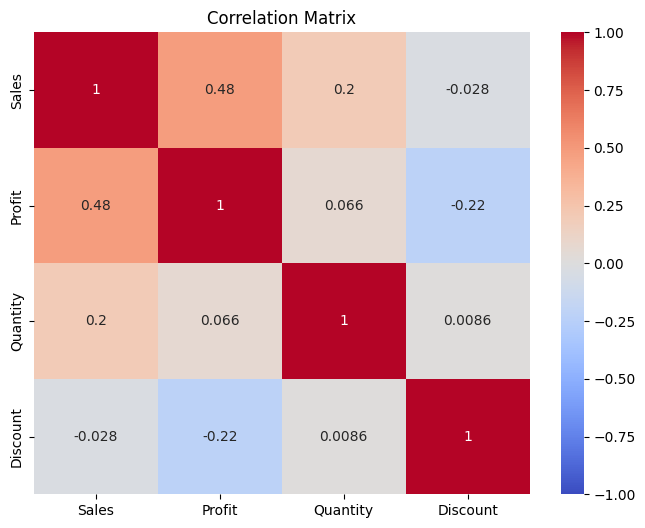

In [17]:
# Select numerical columns for correlation
numerical_cols = ['Sales', 'Profit', 'Quantity', 'Discount']
corr_matrix = data[numerical_cols].corr()

# Heatmap of correlations

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Comments:
# - Correlations reveal relationships (e.g., does higher discount reduce profit?).
# - Values close to 1 or -1 indicate strong positive/negative relationships; near 0 means no correlation.

# 4.4 Outlier Detection

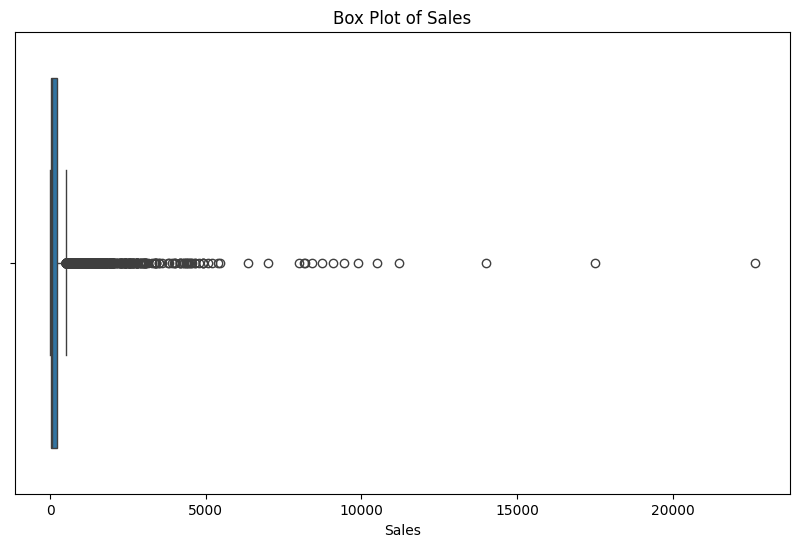

Number of outliers in Sales: 1167


In [18]:
# Box plot to detect outliers in Sales
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Sales'])
plt.title('Box Plot of Sales')
plt.show()

# Use IQR method to quantify outliers
Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['Sales'] < (Q1 - 1.5 * IQR)) | (data['Sales'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers in Sales: {len(outliers)}")

# Comments:
# - Box plot visually identifies outliers (points beyond whiskers).
# - IQR method flags extreme values statistically; these could be high-value sales or errors.

# 5.1 Customer Segmentation with K-means

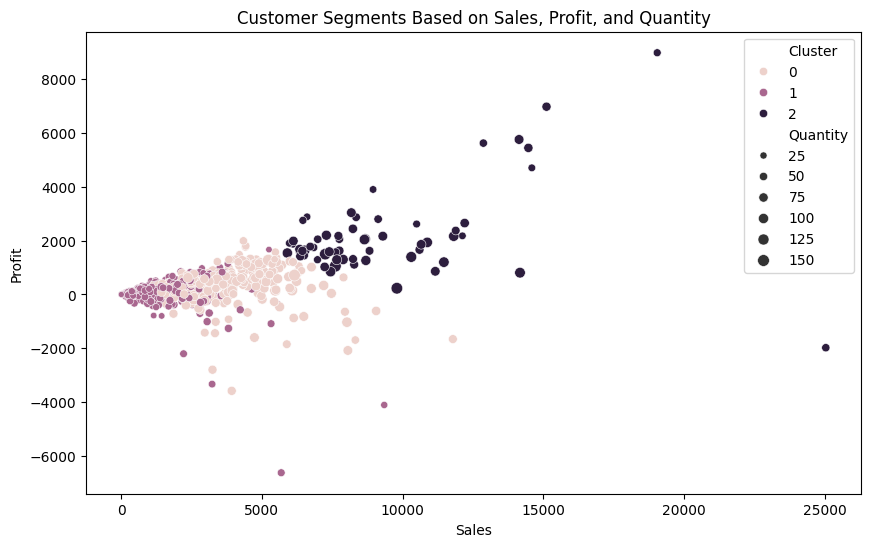

               Sales       Profit   Quantity
Cluster                                     
0        3717.329432   375.098646  67.689655
1        1487.256431   104.300547  30.997743
2        9338.678765  2190.221200  75.183333


In [22]:
# Prepare data for clustering: aggregate by customer
customer_data = data.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Standardize the feature
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[['Sales', 'Profit', 'Quantity']])

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', hue='Cluster', size='Quantity', data=customer_data)
plt.title('Customer Segments Based on Sales, Profit, and Quantity')
plt.show()

# Analyze clusters
#cluster_summary = customer_data.groupby('Cluster').mean()
#cluster_summary = customer_data.info()
print(cluster_summary)

# Comments:
# - We aggregate data per customer to segment based on total sales, profit, and quantity purchased.
# - StandardScaler normalizes features to ensure equal weighting in clustering.
# - K-means with 3 clusters groups customers (e.g., high spenders, low profit, etc.).
# - Scatter plot visualizes segments; cluster means reveal characteristics (e.g., Cluster 0 might be high-profit customers).

In [12]:
customer_data["Cluster"].dtype

dtype('int32')

In [16]:
print(customer_data["Cluster"].mean())

0.7099621689785625


In [23]:
customer_data["Cluster"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 793 entries, 0 to 792
Series name: Cluster
Non-Null Count  Dtype
--------------  -----
793 non-null    int32
dtypes: int32(1)
memory usage: 3.2 KB


# Step 6: Key Insights
**From the EDA and clustering:**

Sales Distribution: Likely right-skewed, with most sales being small and a few large transactions.
Trends: Sales may show seasonality (e.g., holiday peaks).
Top Categories: Certain categories (e.g., Technology) might dominate sales.
Customer Segments: Clusters reveal distinct groups (e.g., high-value vs. low-value customers).
Outliers: High sales outliers could be key accounts or errors to investigate.
# Comments:

These insights guide business decisions, like targeting high-value customers or optimizing low-profit categories.

# Step 7: Interactive Dashboard
We’ll use Dash to create a web-based dashboard.

In [24]:
# Initialize Dash app
app = dash.Dash(__name__)

# Prepare data for dashboard
category_sales = data.groupby('Category')['Sales'].sum().reset_index()
monthly_sales_df = monthly_sales.reset_index()

# Define layout
app.layout = html.Div([
    html.H1("Superstore Sales Dashboard"),

    # Dropdown for category selection
    dcc.Dropdown(
        id='category-dropdown',
        options=[{'label': cat, 'value': cat} for cat in data['Category'].unique()],
        value=data['Category'].unique()[0],
        multi=False
    ),

    # Sales by Category Bar Chart
    dcc.Graph(id='category-sales-bar'),

    # Sales Over Time Plot
    dcc.Graph(id='monthly-sales-plot'),

    # Cluster Scatter Plot
    dcc.Graph(id='cluster-plot')
])

# Define callbacks for interactivity
@app.callback(
    [Output('category-sales-bar', 'figure'),
     Output('monthly-sales-plot', 'figure'),
     Output('cluster-plot', 'figure')],
    [Input('category-dropdown', 'value')]
)
def update_graphs(selected_category):
    # Filter data by selected category
    filtered_data = data[data['Category'] == selected_category]

    # Bar chart for total sales by category
    fig1 = px.bar(category_sales, x='Category', y='Sales', title='Total Sales by Category')

    # Time series plot for selected category
    filtered_monthly = filtered_data.groupby(filtered_data['Order Date'].dt.to_period('M').dt.to_timestamp())['Sales'].sum().reset_index()
    fig2 = px.line(filtered_monthly, x='Order Date', y='Sales', title=f'Sales Over Time ({selected_category})')

    # Cluster scatter plot (static, based on all data)
    fig3 = px.scatter(customer_data, x='Sales', y='Profit', color='Cluster', size='Quantity',
                      title='Customer Segments')

    return fig1, fig2, fig3

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

# Comments:

# The dashboard includes:
A dropdown to filter by product category.
A bar chart of total sales by category.
A time series plot of sales for the selected category.
A scatter plot of customer clusters.
Dash uses callbacks to update plots based on user input (e.g., selecting a category).
Run this code in a Python environment to launch the dashboard locally **(visit http://127.0.0.1:8050/).**

# tep 8: Conclusion
# This project demonstrates:

**EDA:** We explored sales distributions, trends, and relationships, adding comments to explain each step.
Advanced Techniques: Clustering segmented customers, enhancing our understanding beyond basic stats.
Dashboard: An interactive tool allows stakeholders to explore insights dynamically.
To extend this, consider:

Adding predictive models (e.g., sales forecasting).
Incorporating real-time data via APIs.
Enhancing the dashboard with more filters or maps.
# Comments:

The code is reproducible (random seed set) and well-documented for learning.
Adjust file paths and library versions as needed for your environment.